In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
df = pd.read_csv('/content/drive/MyDrive/datasets/used_car_dataset.csv')

In [117]:
df.head(3)

,Brand,model,Year,Age,Driven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,Nov-24,Honda City v teck in mint condition valid genu...,195000
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,Jul-24,Toyota Innova 2.5 G (Diesel) 7 Seater 2009 Diesel,375000
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,Nov-24,Volkswagen Vento 2010-2013 Diesel Breeze 2010 ...,184999


In [118]:
df.info()
# there are no null/missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9582 non-null   object 
 1   model         9582 non-null   object 
 2   Year          9582 non-null   int64  
 3   Age           9582 non-null   int64  
 4   Driven        9535 non-null   float64
 5   Transmission  9582 non-null   object 
 6   Owner         9582 non-null   object 
 7   FuelType      9582 non-null   object 
 8   PostedDate    9582 non-null   object 
 9   AdditionInfo  9582 non-null   object 
 10  AskPrice      9582 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 823.6+ KB


In [119]:
df.head(3)

,Brand,model,Year,Age,Driven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,98000.0,Manual,second,Petrol,Nov-24,Honda City v teck in mint condition valid genu...,195000
1,Toyota,Innova,2009,15,190000.0,Manual,second,Diesel,Jul-24,Toyota Innova 2.5 G (Diesel) 7 Seater 2009 Diesel,375000
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,Nov-24,Volkswagen Vento 2010-2013 Diesel Breeze 2010 ...,184999


In [ ]:
# Outlier detection

In [120]:
df.describe()

,Year,Age,Driven,AskPrice
count,9582.000000,9582.000000,9535.000000,9.582000e+03
mean,2016.361094,7.638906,70605.891453,1.063609e+06
std,4.087226,4.087226,56308.596299,1.658495e+06
min,1986.000000,0.000000,0.000000,1.500000e+04
25%,2014.000000,5.000000,43000.000000,3.610000e+05
50%,2017.000000,7.000000,65000.000000,5.990000e+05
75%,2019.000000,10.000000,86000.000000,1.125000e+06
max,2024.000000,38.000000,980002.000000,4.250000e+07


<Axes: ylabel='Age'>

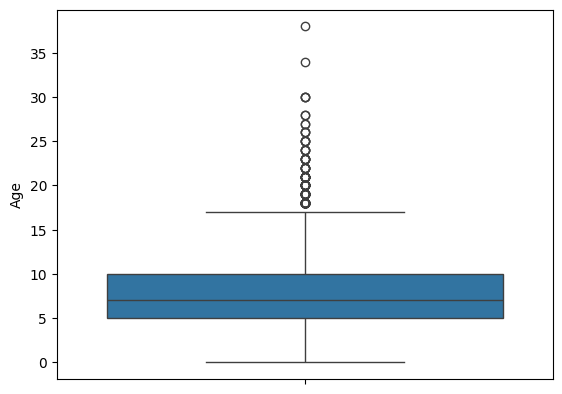

In [121]:
sns.boxplot(df['Age'])

In [122]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1

In [123]:
l_l = q1 - 1.5*iqr
u_l = q3 + 1.5*iqr

In [124]:
df = df[(df['Age']>=l_l) & (df['Age']<= u_l)]

<Axes: ylabel='Age'>

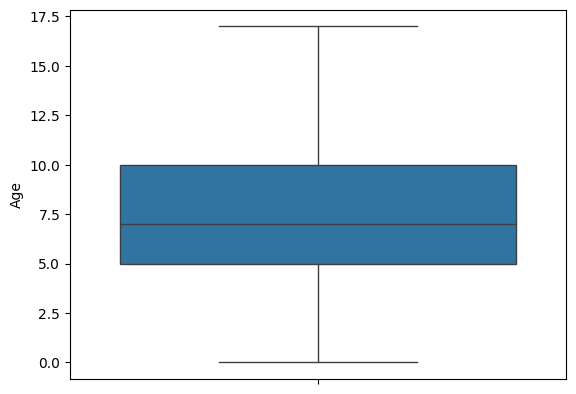

In [125]:
sns.boxplot(df['Age'])

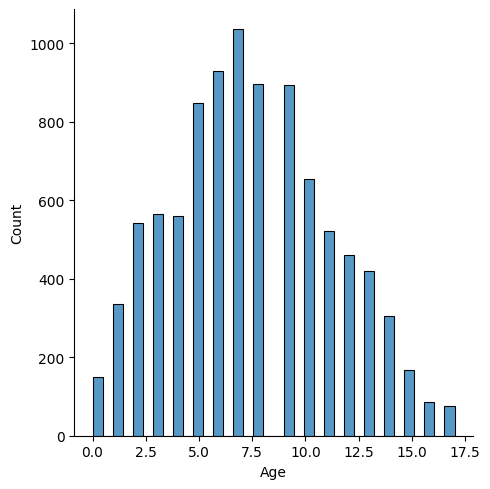

In [126]:
sns.displot(df['Age'])

<Axes: ylabel='Driven'>

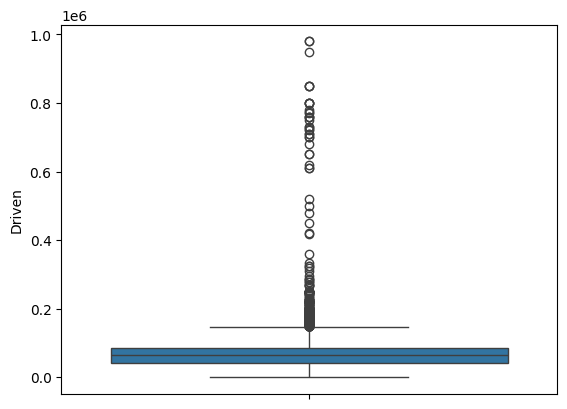

In [127]:
sns.boxplot(df['Driven'])

In [128]:
q1 = df['Driven'].quantile(0.25)
q3 = df['Driven'].quantile(0.75)
iqr = q3-q1
l_l = q1 - 1.5*iqr
u_l = q3 + 1.5*iqr

df = df[(df['Driven']>=l_l) & (df['Driven']<= u_l)]


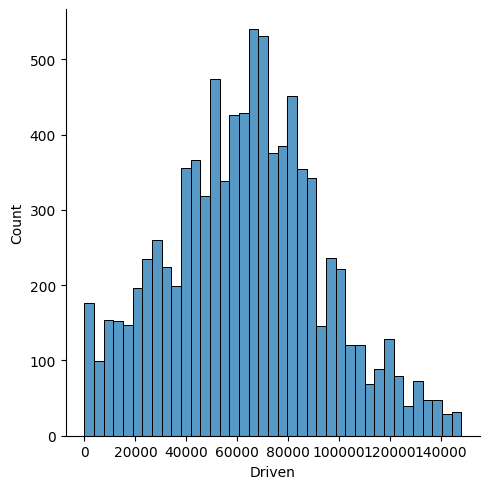

In [129]:
sns.displot(df['Driven'])

In [130]:
df.head(10)

,Brand,model,Year,Age,Driven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,Nov-24,Volkswagen Vento 2010-2013 Diesel Breeze 2010 ...,184999
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,565000
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,Nov-24,Maruti Suzuki Baleno Alpha CVT 2019 Petrol,685000
5,BMW,X3,2014,10,83000.0,Automatic,first,Diesel,Nov-24,BMW X3 2.0 XDRIVE 20D 2014 Diesel,1350000
7,BMW,5 Series,2019,5,25000.0,Automatic,second,Diesel,Nov-24,BMW 5 Series 3.0 530D M Sport 2019 Diesel,5950000
8,Maruti Suzuki,maruti-suzuki-dzire,2020,4,33759.0,Manual,second,Petrol,Nov-24,Maruti Suzuki Dzire 1.2 VXI 2020 Petrol,622000
9,Ford,Ecosport,2017,7,69713.0,Manual,second,Petrol,Nov-24,Ford Ecosport 1.5 Ti VCT MT Titanium BE 2017 P...,649000
10,Maruti Suzuki,Alto-K10,2018,6,70000.0,Automatic,first,Petrol,Nov-24,Maruti Suzuki Alto K10 VXI Airbag 2018 Petrol,395000
11,Kia,Carnival,2021,3,25000.0,Automatic,first,Diesel,Nov-24,Kia Carnival Premium 8 STR 2021 Diesel,2900000
12,Maruti Suzuki,Swift-Dzire,2012,12,72700.0,Manual,second,Petrol,Nov-24,Maruti Suzuki Swift Dzire VXI 1.2 2012 Petrol,240000


In [131]:
# converting the price to Millions for readability
df['Ask_price_millions'] = df['AskPrice'] / 1e6

In [132]:
df.head(5)

,Brand,model,Year,Age,Driven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice,Ask_price_millions
2,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,Nov-24,Volkswagen Vento 2010-2013 Diesel Breeze 2010 ...,184999,0.184999
3,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,565000,0.565000
4,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,Nov-24,Maruti Suzuki Baleno Alpha CVT 2019 Petrol,685000,0.685000
5,BMW,X3,2014,10,83000.0,Automatic,first,Diesel,Nov-24,BMW X3 2.0 XDRIVE 20D 2014 Diesel,1350000,1.350000
7,BMW,5 Series,2019,5,25000.0,Automatic,second,Diesel,Nov-24,BMW 5 Series 3.0 530D M Sport 2019 Diesel,5950000,5.950000


<Axes: ylabel='Ask_price_millions'>

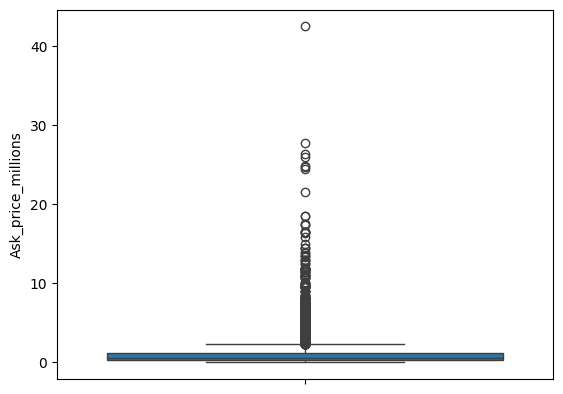

In [133]:


sns.boxplot(df['Ask_price_millions'])

In [134]:
df['Ask_price_millions'].describe()
# mean is around 1.09 and the max value is 42 --> outliers

,Ask_price_millions
count,9006.000000
mean,1.091413
std,1.695268
min,0.018500
25%,0.375000
50%,0.610500
75%,1.151778
max,42.500000


In [142]:
# Handling outliers using IQR method:

q1 = df['Ask_price_millions'].quantile(0.25)
q3 = df['Ask_price_millions'].quantile(0.75)
iqr = q3-q1
l_l = q1 - 1.5*iqr
u_l = q3 + 1.5*iqr

df = df[(df['Ask_price_millions']>= l_l) & (df['Ask_price_millions']<= u_l)]

<Axes: ylabel='Ask_price_millions'>

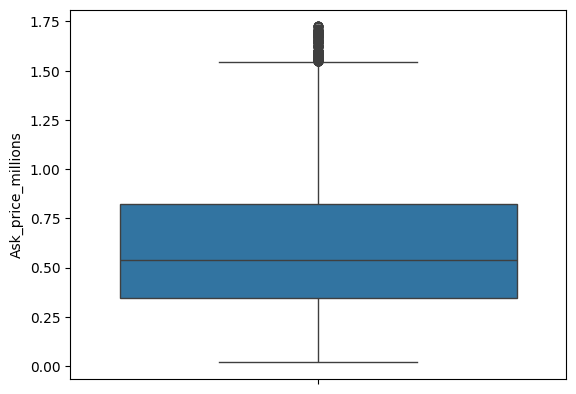

In [143]:
sns.boxplot(df['Ask_price_millions'])

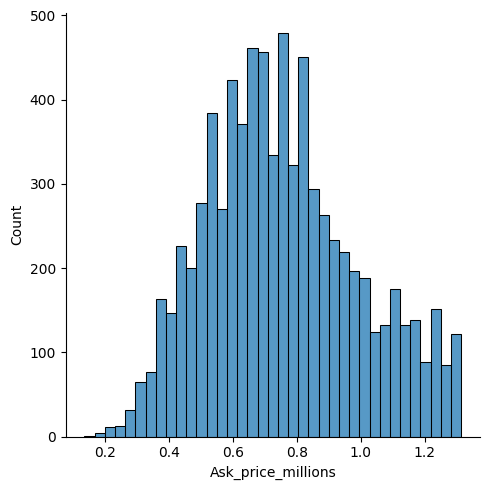

In [144]:
# handling right skewed data using squareroot

sns.displot(np.sqrt(df['Ask_price_millions']))

In [145]:
df['Ask_price_millions']= np.sqrt(df['Ask_price_millions'])

In [146]:
df.describe()

,Year,Age,Driven,AskPrice,Ask_price_millions
count,7710.000000,7710.000000,7710.000000,7.710000e+03,7710.000000
mean,2016.246693,7.753307,65616.400259,6.289845e+05,0.756757
std,3.741463,3.741463,29885.945263,3.841210e+05,0.237299
min,2007.000000,0.000000,0.000000,1.850000e+04,0.136015
25%,2014.000000,5.000000,46000.000000,3.450000e+05,0.587367
50%,2016.000000,8.000000,65584.500000,5.399990e+05,0.734846
75%,2019.000000,10.000000,84000.000000,8.250000e+05,0.908295
max,2024.000000,17.000000,148000.000000,1.725000e+06,1.313393


In [147]:
df.head(3)

,Brand,model,Year,Age,Driven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice,Ask_price_millions
0,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,Nov-24,Volkswagen Vento 2010-2013 Diesel Breeze 2010 ...,184999,0.430115
1,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,565000,0.751665
2,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,Nov-24,Maruti Suzuki Baleno Alpha CVT 2019 Petrol,685000,0.827647


In [148]:
df.reset_index(drop=True, inplace=True)
# resetting the index after dropping values

In [149]:
df.head(4)

,Brand,model,Year,Age,Driven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice,Ask_price_millions
0,Volkswagen,VentoTest,2010,14,77246.0,Manual,first,Diesel,Nov-24,Volkswagen Vento 2010-2013 Diesel Breeze 2010 ...,184999,0.430115
1,Maruti Suzuki,Swift,2017,7,83500.0,Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,565000,0.751665
2,Maruti Suzuki,Baleno,2019,5,45000.0,Automatic,first,Petrol,Nov-24,Maruti Suzuki Baleno Alpha CVT 2019 Petrol,685000,0.827647
3,BMW,X3,2014,10,83000.0,Automatic,first,Diesel,Nov-24,BMW X3 2.0 XDRIVE 20D 2014 Diesel,1350000,1.161895


In [ ]:
# EDA

<Axes: xlabel='Owner', ylabel='count'>

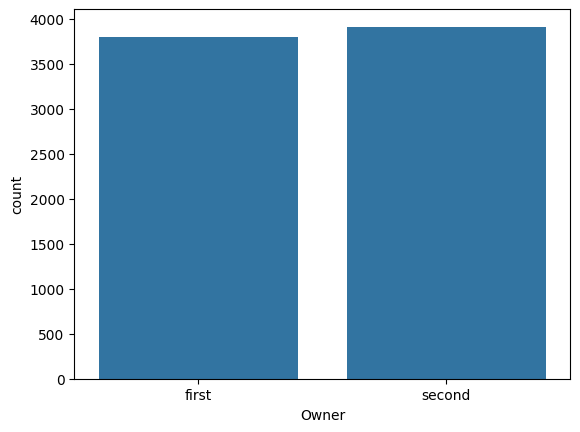

In [150]:
# Distribution of Cars by Owner Type - did most of the used cars have more than 1 previous owner ?
sns.countplot(data=df, x='Owner')
# yes, most cars seem to have had 2 owners.

In [151]:
#  Compare prices across owner types
px.box(df, x='Owner', y='Ask_price_millions', title='Ask Price by Owner Type')
# 0 - first owner --> median price is around 0.79 M
# 1 - second owner --> median price is around 0.67 M

<Axes: xlabel='FuelType', ylabel='count'>

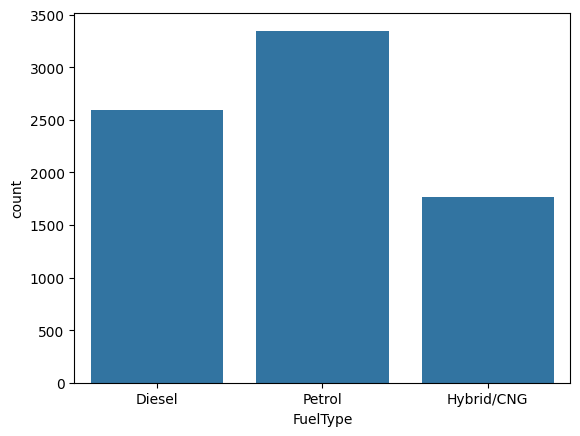

In [95]:

sns.countplot(data=df, x='FuelType')


In [112]:
px.box(df, x='FuelType', y='Ask_price_millions', title='Ask Price by Fuel Type')
# 0 Diesel--> median price 0.866M
# 1 Hybrid/CNG --> median price  0.63M
# 2 petrol -->median price 0.70

<Axes: xlabel='Transmission', ylabel='count'>

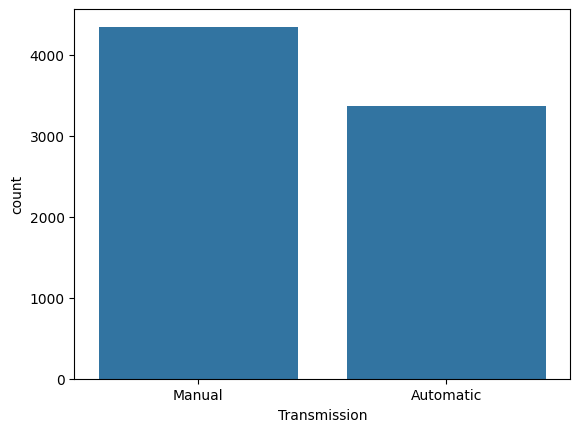

In [96]:

sns.countplot(data=df, x='Transmission')


In [115]:
# Fuel Type & Owner-wise Ask Price
px.box(df, x='FuelType', y='Ask_price_millions', color='Owner',
       title='Fuel Type & Owner-wise Ask Price')

# 0
# 1
# 2 -

In [39]:
# Count of used cars based on brand and model

#df['Brand'].value_counts()

import plotly.express as px

fig = px.sunburst(df, path=["Brand", "model"], title="Car Brands and Models Distribution")
fig.show()

In [38]:
# Average price of car brands
import plotly.express as px

brand_ask_price = df.groupby('Brand',as_index=False)['Ask_price_millions'].mean()

fig = px.treemap(brand_ask_price, path = ['Brand'], values = brand_ask_price['Ask_price_millions'], title = 'Average Car Price by Brand')
fig.show()

In [61]:
#  Pivot table (Models as rows under each Brand)
pivot_table = df.pivot_table(
    index=['Brand', 'model'],
    values='Ask_price_millions',
    aggfunc='count',
)

pivot_table = pivot_table.rename(columns={'Ask_price_millions': 'Count'})

# Sort by Brand and Count (descending within brand)
pivot_table = pivot_table.sort_values(by=['Brand', 'Count'], ascending=False)


print(pivot_table.head(30))


                              Count
Brand      model                   
Volvo      S60                   10
           XC 90                  3
           XC60                   3
           S60 Cross Country      2
           S 80                   1
           S80                    1
           V40 Cross Country      1
Volkswagen Polo                 130
           VentoTest             78
           Vento                 17
           Ameo                  14
           Jetta                 10
           Taigun                 8
           CrossPolo              7
           Passat                 5
           Virtus                 5
           GTI                    3
           Polo GTI               3
           Tiguan                 3
           Beetle                 2
Toyota     Corolla Altis         78
           Innova Crysta         57
           Innova                56
           Etios                 35
           Fortuner              35
           Camry            

<Axes: title={'center': 'Top 10 Car Brands by Listings'}, ylabel='Brand'>

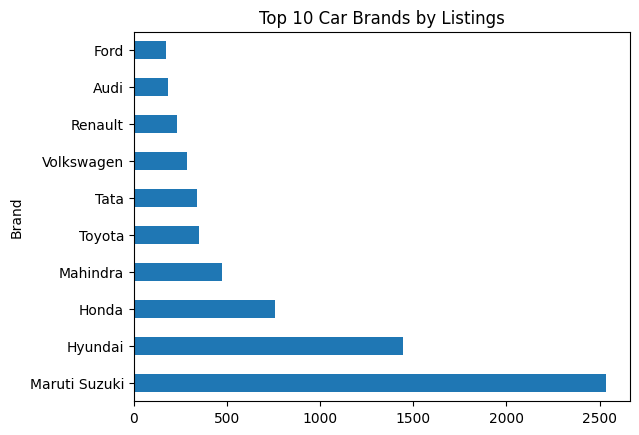

In [76]:
# top brand listing
df['Brand'].value_counts().head(10).plot(kind='barh', title='Top 10 Car Brands by Listings')


<Axes: title={'center': 'Most Listed Car Models'}, xlabel='model'>

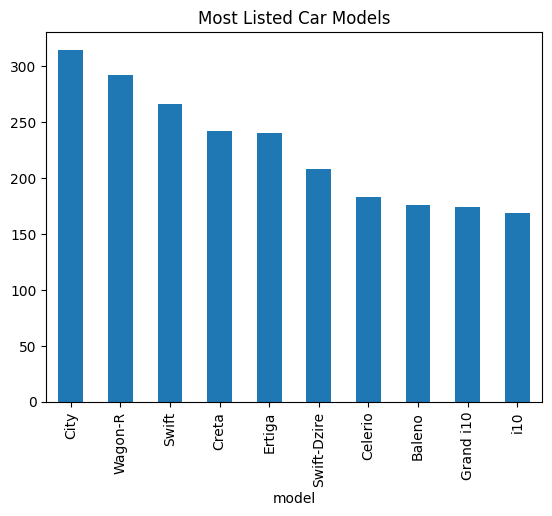

In [75]:
# top models
df['model'].value_counts().head(10).plot(kind='bar', title='Most Listed Car Models')

In [154]:
correlation = df['Age'].corr(df['Ask_price_millions'])
print(f"Correlation between car make (year) and Ask Price: {correlation}")

Correlation between car make (year) and Ask Price: -0.5465651689380963


In [153]:
correlation = df['Year'].corr(df['Driven'])
print(f"Correlation between car make (year) and Kms Driven : {correlation}")

Correlation between car make (year) and Kms Driven : -0.43441246239140197


In [155]:
correlation = df['Driven'].corr(df['Ask_price_millions'])
print(f"Correlation between car Kms Driven and Ask Price: {correlation}")

Correlation between car Kms Driven and Ask Price: -0.17045887207785618


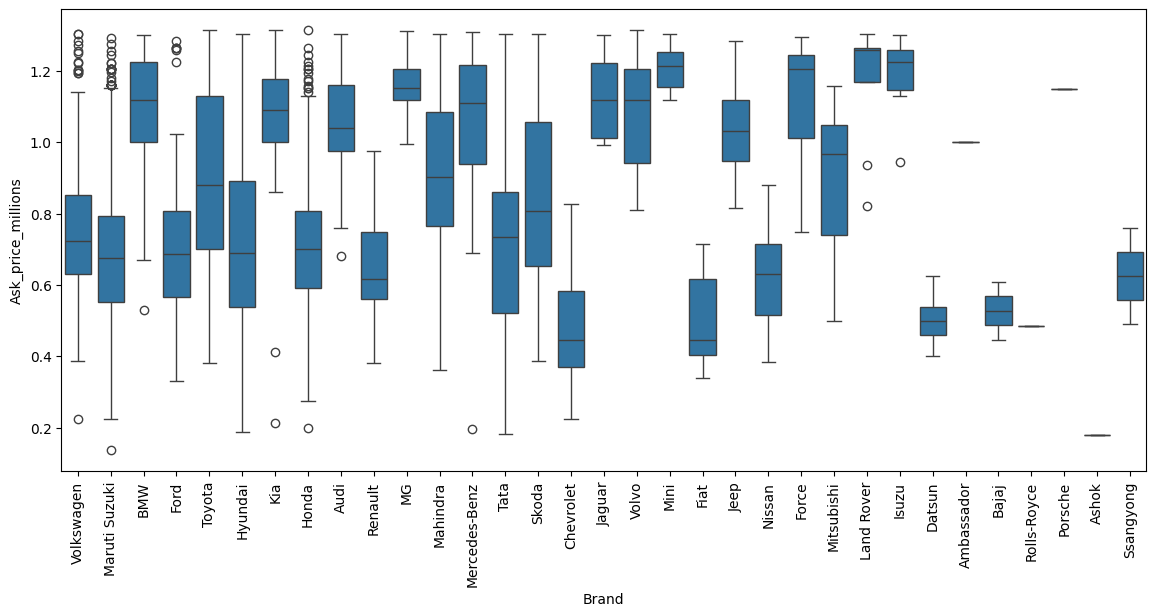

In [156]:
# Price Analysis of Car Brands

plt.figure(figsize=(14,6))
sns.boxplot(x='Brand', y='Ask_price_millions', data=df)
plt.xticks(rotation=90)
plt.show()


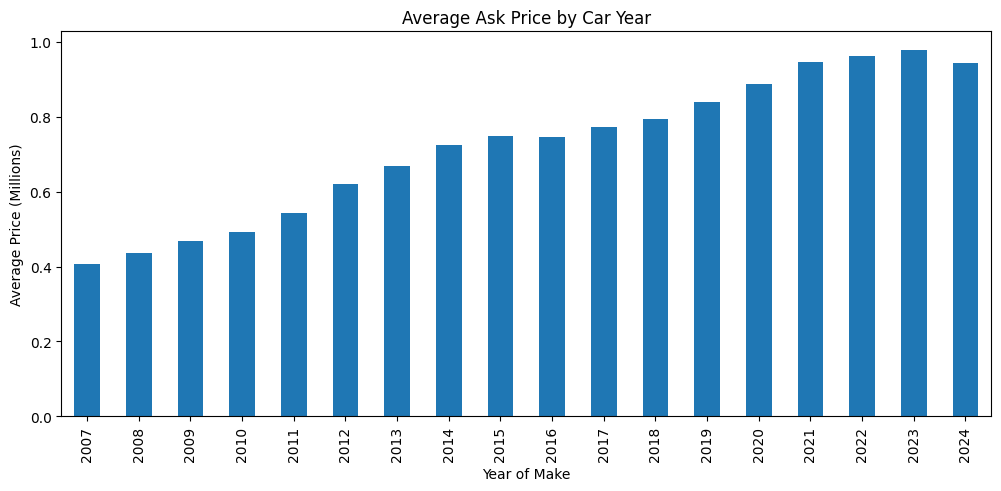

In [157]:
# Average Ask price by Car Age

avg_price_by_year = df.groupby('Year')['Ask_price_millions'].mean().sort_index()
avg_price_by_year.plot(kind='bar', figsize=(12,5), title='Average Ask Price by Car Year')
plt.ylabel('Average Price (Millions)')
plt.xlabel('Year of Make')
plt.show()



In [97]:
from sklearn.preprocessing import LabelEncoder

# for EDA using label encoder for categorical columns (that have no order) is
# fine but this cant be done if we want to create a model

In [99]:
categorical_col = ['FuelType','Transmission','Owner']
d= {}

for c in categorical_col:
  le = LabelEncoder()
  df[c] = le.fit_transform(df[c])
  classes = le.classes_
  print("classes",classes)

  map_d = dict(zip(classes, range(len(classes))))
  print("mapping",map_d)
  d.update(map_d)

classes ['Diesel' 'Hybrid/CNG' 'Petrol']
mapping {'Diesel': 0, 'Hybrid/CNG': 1, 'Petrol': 2}
classes ['Automatic' 'Manual']
mapping {'Automatic': 0, 'Manual': 1}
classes ['first' 'second']
mapping {'first': 0, 'second': 1}


<Axes: >

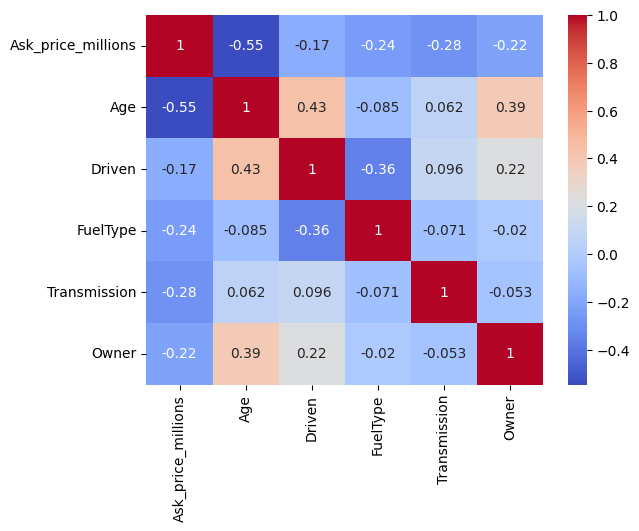

In [104]:
# Correlation heatmap:
corr = df[['Ask_price_millions', 'Age', 'Driven','FuelType','Transmission','Owner']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

- As the transmission value increases (from Automatic(0) → Manual(1), the ask price decreases (negative correlation). Manual cars tend to be cheaper than Automatic ones.

- Second-hand cars (owned by 2nd person) are usually listed for a lower price than first-owner cars.

- As the age of the car increases, the ask price tends to decrease. Newer cars (lower age) typically command higher prices, while older cars are priced lower.





